In [1]:
# !pip install gekko
from gekko import GEKKO
import numpy as np
import matplotlib.pyplot as plt
import math
import os


# Задача 1

$$ \int_0^2 0.5y^2 + y^2t^2 \  dt \ \to min$$

$$ y' = u $$

$$ u \in [-1, 1] $$

$$ y(0) = 1 $$


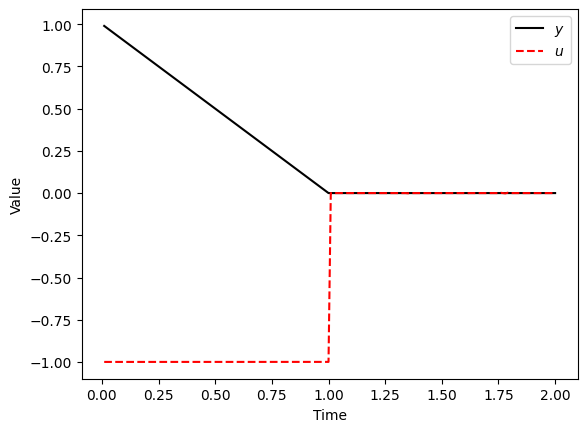

In [2]:
# Инициализируем модель
m = GEKKO(remote=False)
nt = 201
m.time = np.linspace(0, 2, nt)

# Задаём переменные
y = m.Var(value=1)
z = m.Var(value=0)
u = m.Var(value=0, lb=-1, ub=1)
t = m.Var(value=0)

p = np.zeros(nt)    # Отмечаем последнюю точку
p[-1] = 1.0
final = m.Param(value=p)


# Задаём уравнения
m.Equation(y.dt() == u)
m.Equation(t.dt() == 1)
m.Equation(z.dt() == 0.5 * y ** 2 + y**2 * t**2)
m.Obj(z * final)    # Целевая функция (минимизация)
m.options.IMODE = 6 # 6 -- задача оптимального управления/динамического программирования
m.solve(disp=False)


# Рисуем получившееся решение
plt.plot(m.time[1:], y.value[1:], 'k-', label=r'$y$')
plt.plot(m.time[1:], u.value[1:],'r--',label=r'$u$')
plt.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

# Задача 2

$$ \int_0^2 -y+0.5u^2+u \ dt \ \to min$$

$$ y' = y+u $$

$$ y(0) = 2 $$

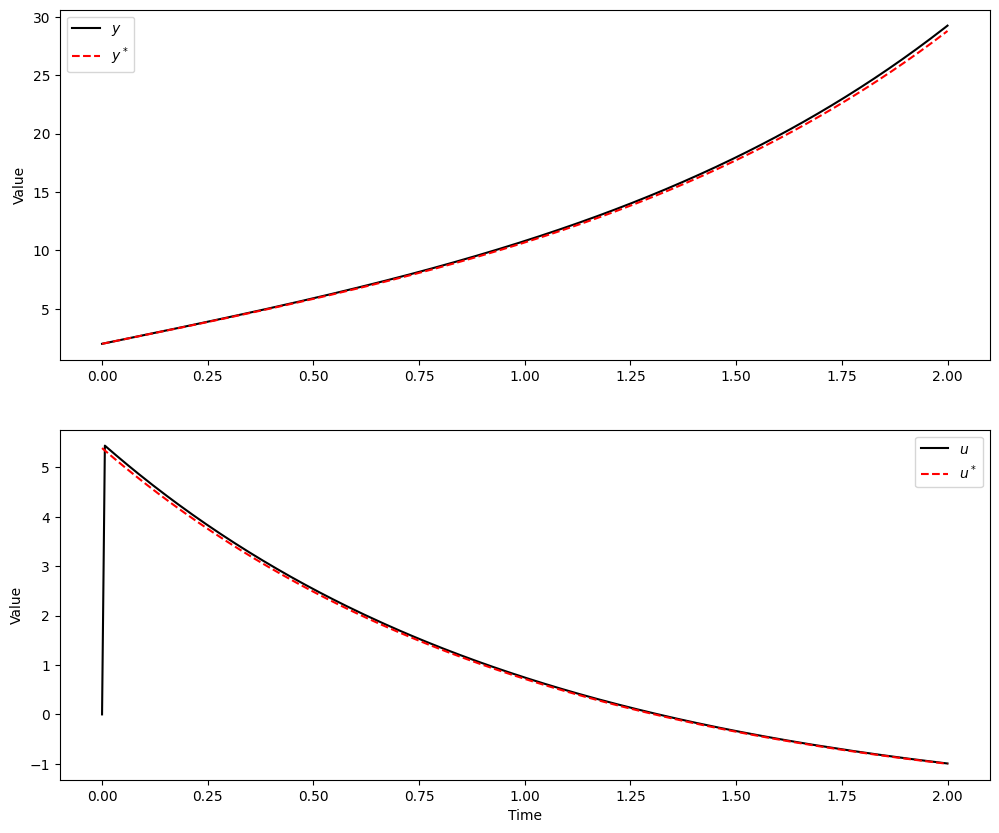

In [3]:
m = GEKKO(remote = False)
nt = 301
m.time = np.linspace(0, 2, nt)

y = m.Var(value = 2)
z = m.Var(value = 0)
u = m.Var(value = 0) 

p = np.zeros(nt)
p[-1] = 1.0
final = m.Param(value=p)


m.Equation(y.dt() == y + u)
m.Equation(z.dt() == -y + (u ** 2) * 0.5 + u)
m.Obj(z*final)
m.options.IMODE = 6
m.solve(disp=False)


def u_a(t):
    return [math.exp(-elem + 2) - 2 for elem in t]

def y_a(t):
    return [2 + 0.5 * math.exp(2) * (math.exp(elem) - math.exp(-elem)) for elem in t]


plt.figure(figsize=(12,10))
plt.subplot(2, 1, 1)
plt.plot(m.time,y.value,'k-',label=r'$y$')
plt.plot(m.time,y_a(m.time),'r--',label=r'$y^*$')
plt.legend(loc='best')
plt.ylabel('Value')
plt.subplot(2, 1, 2)
plt.plot(m.time,u.value,'k-',label=r'$u$')
plt.plot(m.time,u_a(m.time),'r--',label=r'$u^*$')
plt.legend(loc='best')
plt.ylabel('Value')
plt.xlabel('Time')
plt.show()


Небольшой пример для иллюстрации разницы между максимизацией `m.Obj(z)` и `m.Obj(z*final)`:

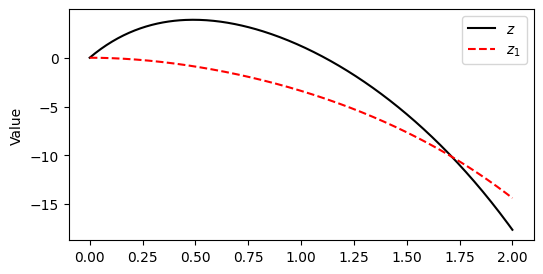

In [14]:
m = GEKKO(remote = False)
nt = 301
m.time = np.linspace(0, 2, nt)

y = m.Var(value = 2)
z = m.Var(value = 0)
u = m.Var(value = 0)

p = np.zeros(nt)
p[-1] = 1.0
final = m.Param(value=p)


m.Equation(y.dt() == y + u)
m.Equation(z.dt() == -y + (u ** 2) * 0.5 + u)
m.Obj(z*final)
m.options.IMODE = 6
m.solve(disp=False)

#----

m1 = GEKKO(remote = False)
m1.time = np.linspace(0, 2, nt)

y1 = m1.Var(value = 2)
z1 = m1.Var(value = 0)
u1 = m1.Var(value = 5)

m1.Equation(y1.dt() == y1 + u1)
m1.Equation(z1.dt() == -y1 + (u1 ** 2) * 0.5 + u1)
m1.Obj(z1)
m1.options.IMODE = 6
m1.solve(disp=False)

plt.figure(figsize=(6,3))
# plt.subplot(2, 1, 1)
plt.plot(m.time, z.value,'k-',label=r'$z$')
plt.plot(m.time, z1.value,'r--',label=r'$z_1$')
plt.legend(loc='best')
plt.ylabel('Value')
# plt.subplot(2,1,2)
# plt.plot(m.time,u.value,'k-',label=r'$u$')
# plt.plot(m.time,u_a(m.time),'r--',label=r'$u^*$')
# plt.legend(loc='best')
# plt.ylabel('Value')
# plt.xlabel('Time')
plt.show()


Так как `z` – кумулятивная сумма от 0 до T, то домножение на `final` позволяет решить задачу по минимизации кумулятивной суммы к последнему периоду. Без домножения мы минимизируем значение этой суммы в каждый момент времени нашей временной шкалы. На картинке выше видно, что в последнем периоде модель с целевой фукцией `z*final` дает меньшее значение интеграла, чем модель с целевой функцией `z`. 

# Задача 3

$$ \int_0^2 -y+0.5u^2+u \ dt$$ 

$$ y' = y+u $$

$$ y(0) = 2 $$

$$u \geq e^{-2}$$

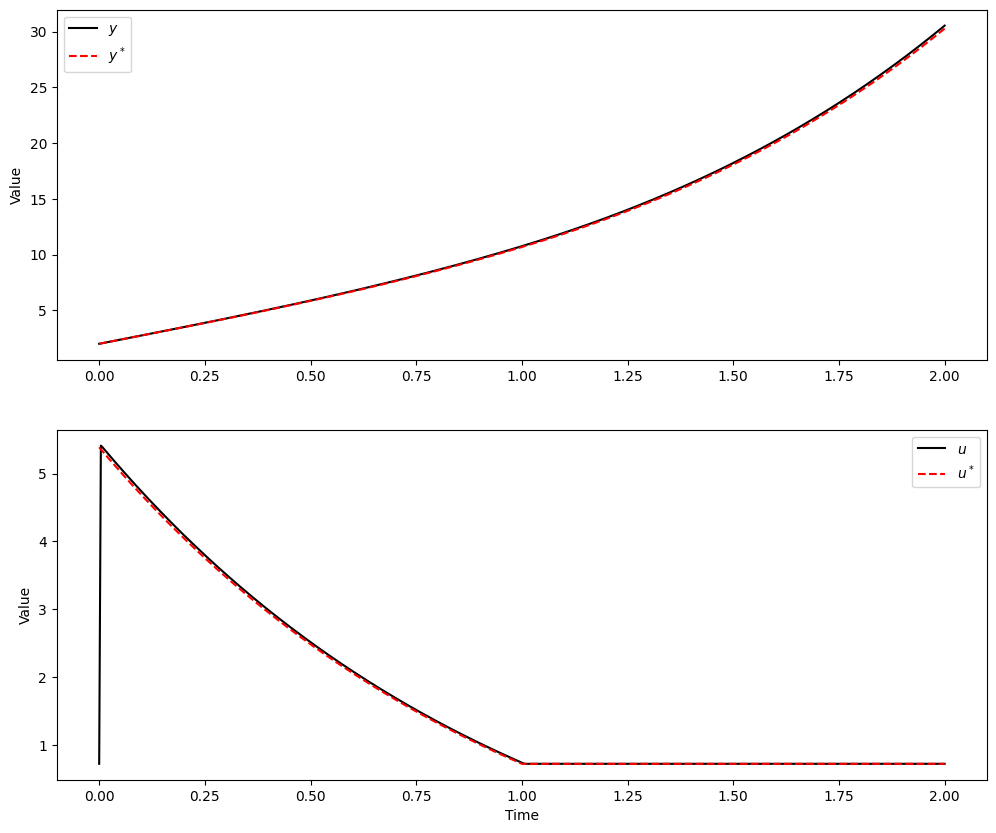

In [4]:
m = GEKKO(remote = False)
nt = 501
m.time = np.linspace(0, 2, nt)

y = m.Var(value=2)
z = m.Var(value=0)
# u = m.Var(value=np.e-2, lb=np.e-2)

u = m.MV(value=0, lb=np.e-2)
u.STATUS = 1

p = np.zeros(nt)
p[-1] = 1.0
final = m.Param(value=p)

m.Equation(y.dt() == y + u)
m.Equation(z.dt() == -y + (u ** 2) * 0.5 + u)
m.Obj(z*final)
m.options.IMODE = 6
m.solve(disp=False)



def u_a(t):
    return [math.exp(-elem + 2) - 2 if elem <= 1
            else math.e - 2
            for elem in t]


def y_a(t):
    return [2 + 0.5 * math.exp(2) * (math.exp(elem) - math.exp(-elem)) if elem <= 1
            else (1 + 0.5 * (math.e ** 2 - 1)) * math.exp(elem) - math.e + 2
            for elem in t]


plt.figure(figsize=(12, 10))
plt.subplot(2, 1, 1)
plt.plot(m.time,y.value,'k-',label=r'$y$')
plt.plot(m.time,y_a(m.time),'r--',label=r'$y^*$')
plt.legend(loc='best')
plt.ylabel('Value')
plt.subplot(2, 1, 2)
plt.plot(m.time,u.value,'k-',label=r'$u$')
plt.plot(m.time,u_a(m.time),'r--',label=r'$u^*$')
plt.legend(loc='best')
plt.ylabel('Value')
plt.xlabel('Time')
plt.show()

# Задача 4

$$ \int_0^T -y+0.5u^2+u \ dt$$

$$ y_1' = u, y_1(0)=\frac{\pi}{2}$$

$$ y_2' = cos{y_1},\  y_2(0)=4,\  y_2(T)<=0$$

$$y_3' = \sin{y_1},\  y_3(0)=0,\  y_3(T)<=0$$

$$ u \in [-2, 2]$$

$$ T  \to min$$

Найденное T: 4.3089555524


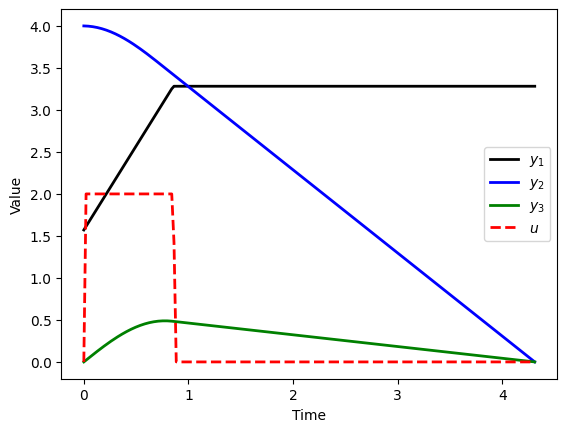

In [5]:
# необходимый оптимизатор IPOPT доступен только в gekko под Winsows
# для Linux/Mac необходима опция remote=True
isLinux = os.name == 'posix'

m = GEKKO(remote=isLinux)
nt = 201
tm = np.linspace(0, 1, nt)
m.time = tm

y1 = m.Var(value=np.pi / 2.0)
y2 = m.Var(value=4.0)
y3 = m.Var(value=0.0)
# u = m.Var(value=0, lb=-2, ub=2)

p = np.zeros(nt)
p[-1] = 1.0
final = m.Param(value=p)

T = m.FV(value=1.0, lb=0.1, ub=100.0)
T.STATUS = 1

u = m.MV(value=0, lb=-2, ub=2)
u.STATUS = 1

m.Equation(y1.dt() == u * T)
m.Equation(y2.dt() == m.cos(y1) * T)
m.Equation(y3.dt() == m.sin(y1) * T)

m.Equation(y2 * final <= 0)
m.Equation(y3 * final <= 0)

m.Obj(T)

m.options.IMODE = 6
m.solve(disp=False)

print('Найденное T: ' + str(T.value[0]))

tm = tm * T.value[0]

plt.figure(1)
plt.plot(tm, y1.value, 'k-', linewidth=2, label=r'$y_1$')
plt.plot(tm, y2.value, 'b-', linewidth=2, label=r'$y_2$')
plt.plot(tm, y3.value, 'g-', linewidth=2, label=r'$y_3$')
plt.plot(tm, u.value, 'r--', linewidth=2, label=r'$u$')
plt.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

# Задача 5
$$ \int_0^1 u^2-y \ dt \ \to max$$
$$ y' = 2u-y$$
$$ u \in [0, 1]$$
$$y(0)=5$$

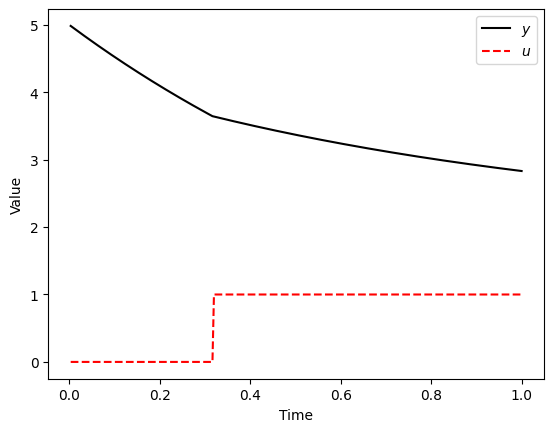

In [7]:
m = GEKKO(remote = True)
nt = 301
m.time = np.linspace(0, 1, nt)

y = m.Var(value=5)
z = m.Var(value=0)
u = m.Var(value=0.4, lb=0, ub=1)

p = np.zeros(nt)
p[-1] = 1.0
final = m.Param(value=p)

# u = m.MV(value=0.7, lb=0, ub=1)
# u.STATUS = 1

m.Equation(y.dt()== 2 * u - y)
m.Equation(z.dt() == -(u ** 2) + y)
m.Obj(z*final)
m.options.IMODE = 6
m.solve(disp=False)



plt.plot(m.time[1:], y.value[1:], 'k-', label=r'$y$')
plt.plot(m.time[1:], u.value[1:],'r--',label=r'$u$')
plt.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()